In [1]:
import pandas as pd

In [2]:
df1h=pd.read_csv('PM10_1h_2018.csv',delimiter=';',na_values=-999.0)
df24h=pd.read_csv('PM10_24h_2018.csv',delimiter=';',na_values=-999.0)

In [3]:
df1h.set_index(pd.to_datetime(df1h['id']),inplace=True)
df24h.set_index(pd.to_datetime(df24h['id']),inplace=True)
del df1h['id']
del df24h['id']

In [4]:
df1h.head()

DsDzialoszyn  DsDziePilsud  DsJelGorOgin  DsKlodzSzkol  \
id                                                                            
2018-01-01 01:00:00         20.30       7.66770      43.89250      133.8600   
2018-01-01 02:00:00         29.29       6.26810       8.63003       38.7881   
2018-01-01 03:00:00         22.84       4.64408      10.06980       18.7503   
2018-01-01 04:00:00         28.72       2.60732      10.33130       14.3927   
2018-01-01 05:00:00         26.84       6.98807       7.18550       12.6442   

                     DsLadekMOB  DsLegAlRzecz  DsLubanMOB  DsNowRudSreb  \
id                                                                        
2018-01-01 01:00:00         NaN       23.5187         NaN      63.94450   
2018-01-01 02:00:00         NaN       14.1490         NaN      53.91790   
2018-01-01 03:00:00         NaN       14.8401         NaN      11.02760   
2018-01-01 04:00:00         NaN       15.7354         NaN      10.87520   
2018-01-01 05:00:00         NaN       17.8611         NaN       7.91935   

                     DsOlawZolnAK  DsWalbrzWyso  ...  WpKaliSawick  \
id                                               ...                 
2018-01-01 01:00:00           NaN       8.49835  ...      35.87200   
2018-01-01 02:00:00           NaN       8.62348  ...      43.91510   
2018-01-01 03:00:00           NaN       4.88555  ...      11.12510   
2018-01-01 04:00:00           NaN       7.99501  ...       9.63558   
2018-01-01 05:00:00           NaN      11.49770  ...       7.29940   

                     WpKoniWyszyn  WpKozieosLes  WpPilaKusoci  WpPoznDabrow  \
id                                                                            
2018-01-01 01:00:00           NaN       32.4526       26.8099       21.9038   
2018-01-01 02:00:00           NaN      105.6190      106.6210       87.3100   
2018-01-01 03:00:00           NaN       34.3070       12.5700       21.1842   
2018-01-01 04:00:00           NaN       25.6756       19.8262       12.7947   
2018-01-01 05:00:00           NaN       17.1216       16.3691       11.9166   

                     WpPoznPolank  ZpKoszArKraj  ZpSzczAndr01  ZpSzczecPrze  \
id                                                                            
2018-01-01 01:00:00       30.1280       37.4186       28.3564       44.5816   
2018-01-01 02:00:00       37.4512       33.3115           NaN       45.4035   
2018-01-01 03:00:00       40.3070       17.1922       14.0619       13.4372   
2018-01-01 04:00:00       40.3070       14.8564       33.2103       13.2602   
2018-01-01 05:00:00       36.4350       15.3655       44.0255       12.7382   

                     ZpSzczLacz04  
id                                 
2018-01-01 01:00:00       19.4714  
2018-01-01 02:00:00           NaN  
2018-01-01 03:00:00       27.2048  
2018-01-01 04:00:00       32.6442  
2018-01-01 05:00:00       57.1604  

[5 rows x 127 columns]

In [5]:
res1h=pd.DataFrame([df1h.mean(), df1h.max(),
                    (df1h.groupby(pd.Grouper(freq="D")).mean()).quantile(0.904),
                   (df1h.groupby(pd.Grouper(freq="D")).mean()>50).sum()],
                   index=['AVYR','MX1H','P904','D50'])

In [6]:
res24=pd.DataFrame([df24h.mean(),df24h.max(),df24h.quantile(0.904),(df24h>50).sum()],index=['AVYR','MAX24','P904','D50'])

In [7]:
res24.T.to_csv('diag_PM10_2018_manual.csv')

In [8]:
res1h.T.to_csv('diag_PM10_2018_auto.csv')

# PM2.5

In [9]:
df1h=pd.read_csv('PM25_1h_2018.csv',delimiter=';',na_values=-999.0)
df24h=pd.read_csv('PM25_24h_2018.csv',delimiter=';',na_values=-999.0)

In [10]:
df1h.set_index(pd.to_datetime(df1h['id']),inplace=True)
df24h.set_index(pd.to_datetime(df24h['id']),inplace=True)
del df1h['id']
del df24h['id']

In [11]:
res1h=pd.DataFrame([df1h.mean(),df1h.max()],index=['AVYR','MX1H'])

In [12]:
res24h=pd.DataFrame([df24h.mean(),df24h.max()],index=['A24H','MX24'])

In [13]:
res24h.T.to_csv('diag_PM25_2018_manual.csv')
res1h.T.to_csv('diag_PM25_2018_auto.csv')

In [14]:
polaczone = pd.concat([res24h.T,res1h.T],axis=1)


/home/mkawka/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
polaczone.head()

A24H    MX24       AVYR     MX1H
DsJelGorOgin        NaN     NaN  21.264427  252.999
DsLegAlRzecz  24.981593  129.62        NaN      NaN
DsOsieczow21  17.056750   90.66        NaN      NaN
DsWalbrzWyso  21.576011  118.26        NaN      NaN
DsWrocAlWisn        NaN     NaN  23.288222  184.770

In [16]:
tt=polaczone.dropna()

In [17]:
tt.describe()

A24H        MX24       AVYR        MX1H
count  17.000000   17.000000  17.000000   17.000000
mean   22.590845   99.351867  22.960402  187.958034
std     4.355134   26.603347   3.990389   66.375173
min    17.471781   56.200000  16.555279   98.991100
25%    20.058142   86.540000  21.086593  134.424000
50%    21.566979   92.945056  22.093136  184.000000
75%    22.977624  108.900000  24.196877  256.028970
max    31.942489  157.470000  30.220111  303.300000

In [18]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [19]:
plt.scatter(x=tt['A24H'],y=tt['AVYR'])
plt.plot([10,40],[10,40],'r-')
plt.xlabel('Średnie PM2.5 manualne')
plt.ylabel('Średnie PM2.5 automatyczne')
plt.title('dane GIOŚ za 2018 rok')

Text(0.5, 1.0, 'dane GIOŚ za 2018 rok')

Text(0.5, 1.0, 'dane GIOŚ za 2018 rok')

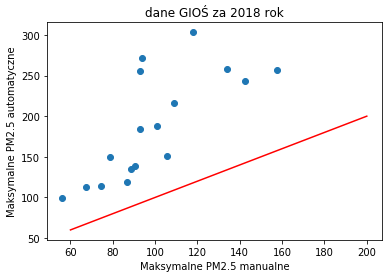

In [20]:
plt.scatter(x=tt['MX24'],y=tt['MX1H'])
plt.plot([60,200],[60,200],'r-')
plt.xlabel('Maksymalne PM2.5 manualne')
plt.ylabel('Maksymalne PM2.5 automatyczne')
plt.title('dane GIOŚ za 2018 rok')